OUTLIER DETECTION AND REMOVAL USING IQR

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

step 2:load your data and find which column is skewed

In [5]:
df=pd.read_csv('outlier_placement.csv')
df.sample(5)

,cgpa,placement_exam_marks,placed
861,6.32,28.0,0
991,7.04,57.0,0
504,7.24,25.0,0
676,6.73,21.0,1
690,7.01,26.0,0


C:\Users\Prakhar\AppData\Local\Temp\ipykernel_3404\475374165.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: ylabel='placement_exam_marks'>

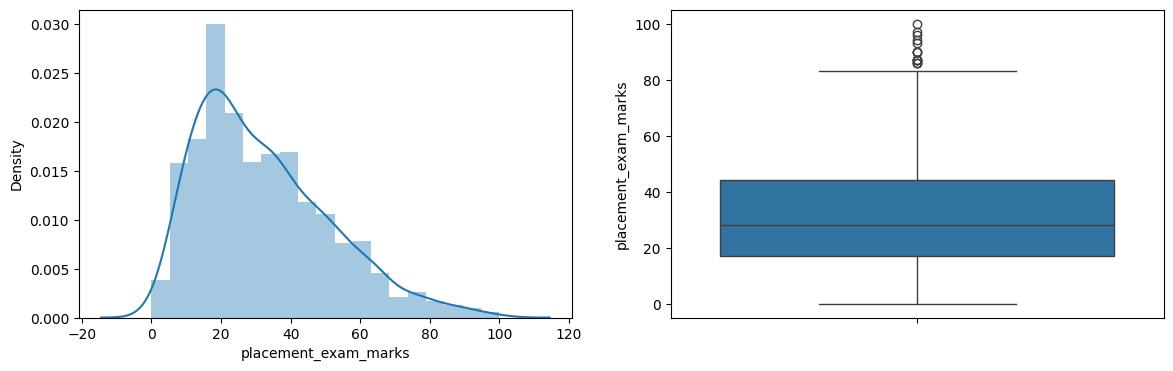

In [8]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(1,2,2)
sns.boxplot(df['placement_exam_marks'])

In [10]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

step 3: finding the mean mn max std of that skewed column

In [9]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

step 4: finding IQR

In [31]:
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)

iqr=percentile75-percentile25

step 5: finding the upper limit and lower limit 

In [32]:
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

In [33]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


step 6:trimming these outliers 

In [34]:
new_df=df[df['placement_exam_marks']<upper_limit]

comparing before and after trimming 

C:\Users\Prakhar\AppData\Local\Temp\ipykernel_3404\1582806943.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\Prakhar\AppData\Local\Temp\ipykernel_3404\1582806943.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


Text(0.5, 1.0, 'after trimmming')

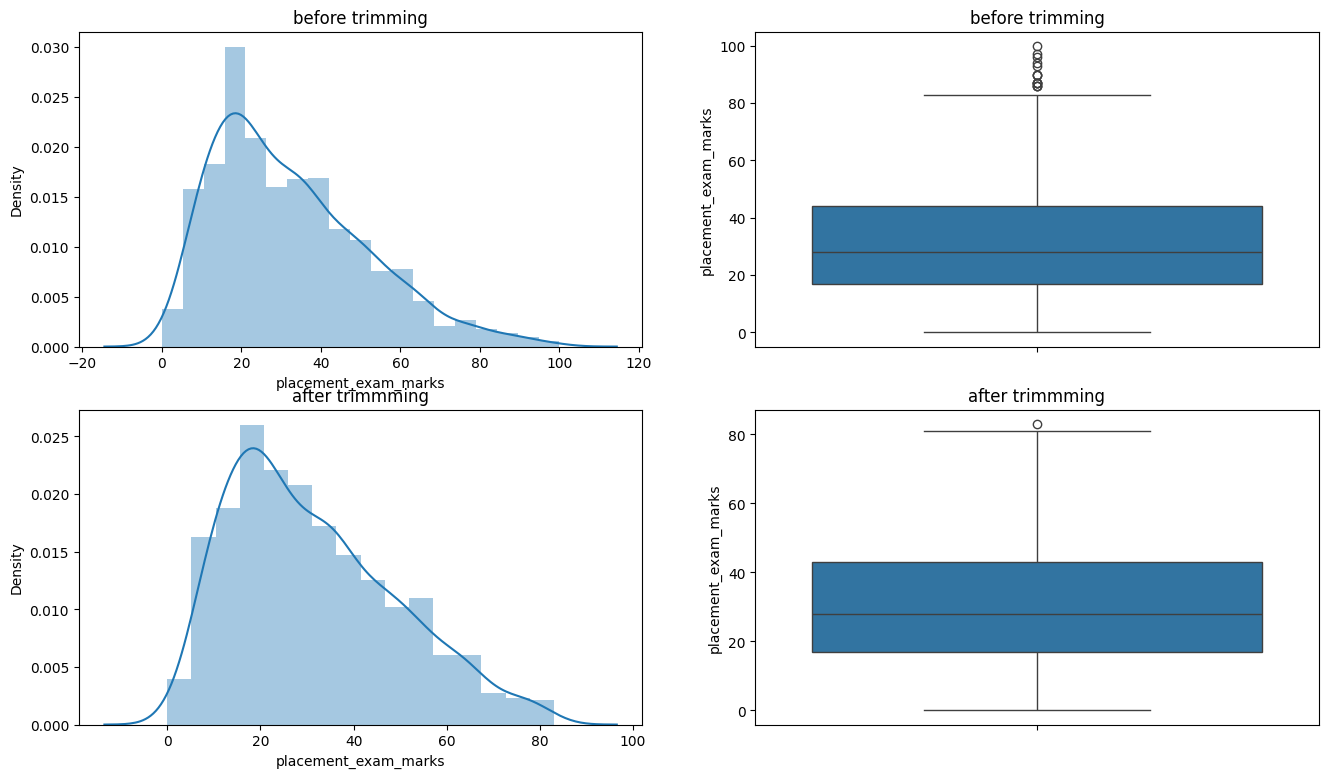

In [35]:
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])
plt.title('before trimming')

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])
plt.title('before trimming')

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])
plt.title('after trimmming')

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])
plt.title('after trimmming')

CAPPING

In [36]:
new_df_cap=df.copy()

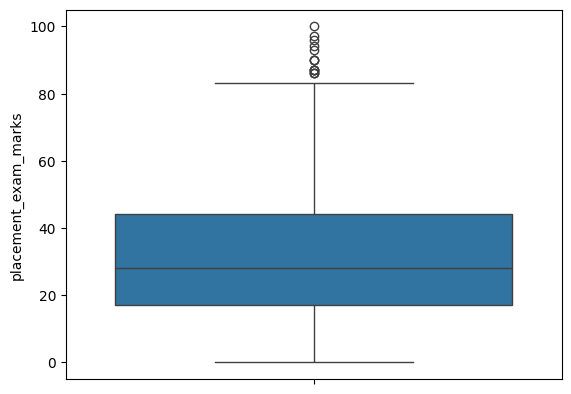

In [37]:
new_df_cap['plement_exam_marks']=np.where(
    new_df_cap['placement_exam_marks']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks']<lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

sns.boxplot(new_df_cap['placement_exam_marks'])
plt.show()